# 1. Accediendo Corporas Textuales

Un **corpus** de textos es un gran conjunto de textos. 


In [1]:
#cargamos la nltk
import nltk
from __future__ import division
#Gráficas
import matplotlib
%matplotlib inline
#cambio los colores a ggplot
matplotlib.style.use('ggplot')
#cambio la fuente a 18
font={'size':18}
matplotlib.rc('font',**font)

## Corpus Gutenberg 
Consiste en un conjunto de documentos de la web del projecto Gutenberg.http://www.gutenberg.org/

In [2]:
#listado de ficheros del corpus
nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [3]:
#la función words seguida del nombre del fichero nos permite acceder al texto como un listado de palabras
emma=nltk.corpus.gutenberg.words("austen-emma.txt")
len(emma)

192427

In [4]:
#para poder acceder a las funciones que vimos en el capítulo 1 debemos trasnformarlo en un objeto Text
emma=nltk.Text(nltk.corpus.gutenberg.words("austen-emma.txt"))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [5]:
#otra forma más cómoda de importarlo
from nltk.corpus import gutenberg
print gutenberg.fileids()
emma=gutenberg.words('austen-emma.txt')

[u'austen-emma.txt', u'austen-persuasion.txt', u'austen-sense.txt', u'bible-kjv.txt', u'blake-poems.txt', u'bryant-stories.txt', u'burgess-busterbrown.txt', u'carroll-alice.txt', u'chesterton-ball.txt', u'chesterton-brown.txt', u'chesterton-thursday.txt', u'edgeworth-parents.txt', u'melville-moby_dick.txt', u'milton-paradise.txt', u'shakespeare-caesar.txt', u'shakespeare-hamlet.txt', u'shakespeare-macbeth.txt', u'whitman-leaves.txt']


In [10]:
#vamos a imprimir algunas estadísticas del corpus gutenberg
print " media palabra \t media sentencia \t diversidad léxica \t fichero \n"
for fid in gutenberg.fileids():
    #caracteres del fichero 
    num_char=len(gutenberg.raw(fid))
    #palabras del fichero
    num_word=len(gutenberg.words(fid))
    #sentencias
    num_sent=len(gutenberg.sents(fid))
    #vocabulario
    num_vocab=len(set(w.lower() for w in gutenberg.words(fid)))
    print "{0} \t {1} \t {2} \t {3} ".format(round(num_char/num_word),round(num_word/num_sent),round(num_word/num_vocab), fid)

 media palabra 	 media sentencia 	 diversidad léxica 	 fichero 

5.0 	 25.0 	 26.0 	 austen-emma.txt 
5.0 	 26.0 	 17.0 	 austen-persuasion.txt 
5.0 	 28.0 	 22.0 	 austen-sense.txt 
4.0 	 34.0 	 79.0 	 bible-kjv.txt 
5.0 	 19.0 	 5.0 	 blake-poems.txt 
4.0 	 19.0 	 14.0 	 bryant-stories.txt 
4.0 	 18.0 	 12.0 	 burgess-busterbrown.txt 
4.0 	 20.0 	 13.0 	 carroll-alice.txt 
5.0 	 20.0 	 12.0 	 chesterton-ball.txt 
5.0 	 23.0 	 11.0 	 chesterton-brown.txt 
5.0 	 18.0 	 11.0 	 chesterton-thursday.txt 
4.0 	 21.0 	 25.0 	 edgeworth-parents.txt 
5.0 	 26.0 	 15.0 	 melville-moby_dick.txt 
5.0 	 52.0 	 11.0 	 milton-paradise.txt 
4.0 	 12.0 	 9.0 	 shakespeare-caesar.txt 
4.0 	 12.0 	 8.0 	 shakespeare-hamlet.txt 
4.0 	 12.0 	 7.0 	 shakespeare-macbeth.txt 
5.0 	 36.0 	 12.0 	 whitman-leaves.txt 


Resumen de funciones sobre un corpus:
- fileids: nos da la lista de los ficheros del corpus
- raw: lee el fichero sin ningún tipo de procesamiento.
- words: lee el fichero como un array de palabras.
- sents: lee el fichero y lo devuelve como un array de sentencias.

In [12]:
#otro ejemplo, usamos Macbeth
macbeth_sents=gutenberg.sents("shakespeare-macbeth.txt")
macbeth_sents

[[u'[', u'The', u'Tragedie', u'of', u'Macbeth', u'by', u'William', u'Shakespeare', u'1603', u']'], [u'Actus', u'Primus', u'.'], ...]

In [13]:
macbeth_sents[1116]

[u'Double',
 u',',
 u'double',
 u',',
 u'toile',
 u'and',
 u'trouble',
 u';',
 u'Fire',
 u'burne',
 u',',
 u'and',
 u'Cauldron',
 u'bubble']

In [14]:
#calculamos la longitud para la sentencia más larga en Macbeth
sentencia_mas_larga=max([len(s) for s in macbeth_sents])
print sentencia_mas_larga

158


In [15]:
#buscamos esas sentencias
[s for s in macbeth_sents if len(s)==sentencia_mas_larga]

[[u'Doubtfull',
  u'it',
  u'stood',
  u',',
  u'As',
  u'two',
  u'spent',
  u'Swimmers',
  u',',
  u'that',
  u'doe',
  u'cling',
  u'together',
  u',',
  u'And',
  u'choake',
  u'their',
  u'Art',
  u':',
  u'The',
  u'mercilesse',
  u'Macdonwald',
  u'(',
  u'Worthie',
  u'to',
  u'be',
  u'a',
  u'Rebell',
  u',',
  u'for',
  u'to',
  u'that',
  u'The',
  u'multiplying',
  u'Villanies',
  u'of',
  u'Nature',
  u'Doe',
  u'swarme',
  u'vpon',
  u'him',
  u')',
  u'from',
  u'the',
  u'Westerne',
  u'Isles',
  u'Of',
  u'Kernes',
  u'and',
  u'Gallowgrosses',
  u'is',
  u'supply',
  u"'",
  u'd',
  u',',
  u'And',
  u'Fortune',
  u'on',
  u'his',
  u'damned',
  u'Quarry',
  u'smiling',
  u',',
  u'Shew',
  u"'",
  u'd',
  u'like',
  u'a',
  u'Rebells',
  u'Whore',
  u':',
  u'but',
  u'all',
  u"'",
  u's',
  u'too',
  u'weake',
  u':',
  u'For',
  u'braue',
  u'Macbeth',
  u'(',
  u'well',
  u'hee',
  u'deserues',
  u'that',
  u'Name',
  u')',
  u'Disdayning',
  u'Fortune',
  u',',

## Web and chat
Otro repositorio basado en información recuperada de la web y de ciertas salas de chat.

In [16]:
#corpus de la web
from nltk.corpus import webtext
for fid in webtext.fileids():
    print fid, webtext.raw(fid)[:65],'...'

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [19]:
#corpus de chat
from nltk.corpus import nps_chat
#en este caso los ficheros son XML
chatroom=nps_chat.posts("10-19-20s_706posts.xml")
chatroom[123]

[u'i',
 u'do',
 u"n't",
 u'want',
 u'hot',
 u'pics',
 u'of',
 u'a',
 u'female',
 u',',
 u'I',
 u'can',
 u'look',
 u'in',
 u'a',
 u'mirror',
 u'.']

## Corpus Brown
Es el primer corpus de más de un millón de documentos en inglés, creado en 1961 en la Universidad Brown. Contiene más de 500 fuentes categorizadas. Suele ser una referencia en análisis de estilometria.

In [2]:
from nltk.corpus import brown
print brown.categories()

[u'adventure', u'belles_lettres', u'editorial', u'fiction', u'government', u'hobbies', u'humor', u'learned', u'lore', u'mystery', u'news', u'religion', u'reviews', u'romance', u'science_fiction']


In [21]:
brown.words(categories='news')

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]

In [22]:
brown.words(fileids=['cg22'])

[u'Does', u'our', u'society', u'have', u'a', ...]

In [23]:
brown.sents(categories=['news','editorial','reviews'])

[[u'The', u'Fulton', u'County', u'Grand', u'Jury', u'said', u'Friday', u'an', u'investigation', u'of', u"Atlanta's", u'recent', u'primary', u'election', u'produced', u'``', u'no', u'evidence', u"''", u'that', u'any', u'irregularities', u'took', u'place', u'.'], [u'The', u'jury', u'further', u'said', u'in', u'term-end', u'presentments', u'that', u'the', u'City', u'Executive', u'Committee', u',', u'which', u'had', u'over-all', u'charge', u'of', u'the', u'election', u',', u'``', u'deserves', u'the', u'praise', u'and', u'thanks', u'of', u'the', u'City', u'of', u'Atlanta', u"''", u'for', u'the', u'manner', u'in', u'which', u'the', u'election', u'was', u'conducted', u'.'], ...]

In [5]:
#vamos a contar los verbos modales que se utilizan dependiendo del género
#cogemos todas las palabras de la categoria de noticias
news_text=brown.words(categories="news")
#creamos una distribución de frecuencias con las palabras en minúsculas para que no nos la juege
fdist=nltk.FreqDist(w.lower() for w  in news_text)
#creamos una lista de verbos modales
modales=["can","could","must","may","might","will","would"]
#consultamos la frecuencia de cada verbo en la lista
for m in modales:
    #usamos la coma al final de print para que no escriba la siguiente cadena en una nueva linea
    print ("{0} : {1} \t".format(m,fdist[m])),

can : 94 	could : 87 	must : 53 	may : 93 	might : 38 	will : 389 	would : 246 	

In [7]:
#para realizarlo con las palabras con wh
whwords=["what","when","who","when","why","where"]
for m in whwords:
    print ("{0} : {1} \t".format(m,fdist[m])),

what : 95 	when : 169 	who : 268 	when : 169 	why : 14 	where : 59 	

In [11]:
#En los ejemplos anteriores hemos ido a un sólo genero, vamos a ir a varios generos
#creamos una distribución condicional, donde obtenemos una lista de generos y por cada genero una lista de palabras
#y lo transformamos en una lista de pares
cfd=nltk.ConditionalFreqDist((genero,palabra)
                                for genero in brown.categories()
                                for palabra in brown.words(categories=genero))
#guardamos una lista de generos, he cogido todos, en el libro coje un subconjunto
generos=brown.categories()
#la lista de modales ya está definida en la casilla anterior no la repito
#pedimos que nos muestre la tabla agrupando por genero y que nos muestre sólo los modales
cfd.tabulate(conditions=generos,samples=modales)


                  can could  must   may might  will would 
      adventure    46   151    27     5    58    50   191 
 belles_lettres   246   213   170   207   113   236   392 
      editorial   121    56    53    74    39   233   180 
        fiction    37   166    55     8    44    52   287 
     government   117    38   102   153    13   244   120 
        hobbies   268    58    83   131    22   264    78 
          humor    16    30     9     8     8    13    56 
        learned   365   159   202   324   128   340   319 
           lore   170   141    96   165    49   175   186 
        mystery    42   141    30    13    57    20   186 
           news    93    86    50    66    38   389   244 
       religion    82    59    54    78    12    71    68 
        reviews    45    40    19    45    26    58    47 
        romance    74   193    45    11    51    43   244 
science_fiction    16    49     8     4    12    16    79 


## Corpus de Reuters

Este corpus se suele utilizar en text mining, contien 10.788 documentos y un total de 1.3 millones de palabras. Se divide en dos grupos: train y test. De forma que cada identificador es de la forma `test/14826`. A diferencia de Brown, en este caso un texto puede pertenecer a varias categorias, ya que la noticias en ocasione tratan de varios temas.

In [13]:
from nltk.corpus import reuters

print reuters.fileids()

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843', 'test/14844', 'test/14849', 'test/14852', 'test/14854', 'test/14858', 'test/14859', 'test/14860', 'test/14861', 'test/14862', 'test/14863', 'test/14865', 'test/14867', 'test/14872', 'test/14873', 'test/14875', 'test/14876', 'test/14877', 'test/14881', 'test/14882', 'test/14885', 'test/14886', 'test/14888', 'test/14890', 'test/14891', 'test/14892', 'test/14899', 'test/14900', 'test/14903', 'test/14904', 'test/14907', 'test/14909', 'test/14911', 'test/14912', 'test/14913', 'test/14918', 'test/14919', 'test/14921', 'test/14922', 'test/14923', 'test/14926', 'test/14928', 'test/14930', 'test/14931', 'test/14932', 'test/14933', 'test/14934', 'test/14941', 'test/14943', 'test/14949', 'test/14951', 'test/14954', 'test/14957', 'test/14958', 'test/14959', 'test/14960', 'test/14962', 'test/14963', 'test/14964', 'test/14965', 'test/14967', 'test/14968', 'test

In [14]:
print reuters.categories()

[u'acq', u'alum', u'barley', u'bop', u'carcass', u'castor-oil', u'cocoa', u'coconut', u'coconut-oil', u'coffee', u'copper', u'copra-cake', u'corn', u'cotton', u'cotton-oil', u'cpi', u'cpu', u'crude', u'dfl', u'dlr', u'dmk', u'earn', u'fuel', u'gas', u'gnp', u'gold', u'grain', u'groundnut', u'groundnut-oil', u'heat', u'hog', u'housing', u'income', u'instal-debt', u'interest', u'ipi', u'iron-steel', u'jet', u'jobs', u'l-cattle', u'lead', u'lei', u'lin-oil', u'livestock', u'lumber', u'meal-feed', u'money-fx', u'money-supply', u'naphtha', u'nat-gas', u'nickel', u'nkr', u'nzdlr', u'oat', u'oilseed', u'orange', u'palladium', u'palm-oil', u'palmkernel', u'pet-chem', u'platinum', u'potato', u'propane', u'rand', u'rape-oil', u'rapeseed', u'reserves', u'retail', u'rice', u'rubber', u'rye', u'ship', u'silver', u'sorghum', u'soy-meal', u'soy-oil', u'soybean', u'strategic-metal', u'sugar', u'sun-meal', u'sun-oil', u'sunseed', u'tea', u'tin', u'trade', u'veg-oil', u'wheat', u'wpi', u'yen', u'zinc']


In [15]:
#vemos las categorias asociadas a un fichero
reuters.categories('training/9865')

[u'barley', u'corn', u'grain', u'wheat']

In [16]:
reuters.categories(['training/9865','training/9880'])

[u'barley', u'corn', u'grain', u'money-fx', u'wheat']

In [17]:
#vemos las noticias que tratan sobre un tema concreto
reuters.fileids('barley')

[u'test/15618',
 u'test/15649',
 u'test/15676',
 u'test/15728',
 u'test/15871',
 u'test/15875',
 u'test/15952',
 u'test/17767',
 u'test/17769',
 u'test/18024',
 u'test/18263',
 u'test/18908',
 u'test/19275',
 u'test/19668',
 u'training/10175',
 u'training/1067',
 u'training/11208',
 u'training/11316',
 u'training/11885',
 u'training/12428',
 u'training/13099',
 u'training/13744',
 u'training/13795',
 u'training/13852',
 u'training/13856',
 u'training/1652',
 u'training/1970',
 u'training/2044',
 u'training/2171',
 u'training/2172',
 u'training/2191',
 u'training/2217',
 u'training/2232',
 u'training/3132',
 u'training/3324',
 u'training/395',
 u'training/4280',
 u'training/4296',
 u'training/5',
 u'training/501',
 u'training/5467',
 u'training/5610',
 u'training/5640',
 u'training/6626',
 u'training/7205',
 u'training/7579',
 u'training/8213',
 u'training/8257',
 u'training/8759',
 u'training/9865',
 u'training/9958']

In [18]:
#vemos las noticias que tratan todos los temas de la lista
reuters.fileids(['barley','corn'])

[u'test/14832',
 u'test/14858',
 u'test/15033',
 u'test/15043',
 u'test/15106',
 u'test/15287',
 u'test/15341',
 u'test/15618',
 u'test/15648',
 u'test/15649',
 u'test/15676',
 u'test/15686',
 u'test/15720',
 u'test/15728',
 u'test/15845',
 u'test/15856',
 u'test/15860',
 u'test/15863',
 u'test/15871',
 u'test/15875',
 u'test/15877',
 u'test/15890',
 u'test/15904',
 u'test/15906',
 u'test/15910',
 u'test/15911',
 u'test/15917',
 u'test/15952',
 u'test/15999',
 u'test/16012',
 u'test/16071',
 u'test/16099',
 u'test/16147',
 u'test/16525',
 u'test/16624',
 u'test/16751',
 u'test/16765',
 u'test/17503',
 u'test/17509',
 u'test/17722',
 u'test/17767',
 u'test/17769',
 u'test/18024',
 u'test/18035',
 u'test/18263',
 u'test/18482',
 u'test/18614',
 u'test/18908',
 u'test/18954',
 u'test/18973',
 u'test/19165',
 u'test/19275',
 u'test/19668',
 u'test/19721',
 u'test/19821',
 u'test/20018',
 u'test/20366',
 u'test/20637',
 u'test/20645',
 u'test/20649',
 u'test/20723',
 u'test/20763',
 u'test/

In [20]:
reuters.words('training/9865')[:14]

[u'FRENCH',
 u'FREE',
 u'MARKET',
 u'CEREAL',
 u'EXPORT',
 u'BIDS',
 u'DETAILED',
 u'French',
 u'operators',
 u'have',
 u'requested',
 u'licences',
 u'to',
 u'export']

In [21]:
reuters.words(['training/9865','training/9880'])

[u'FRENCH', u'FREE', u'MARKET', u'CEREAL', u'EXPORT', ...]

In [22]:
reuters.words(categories='barley')

[u'FRENCH', u'FREE', u'MARKET', u'CEREAL', u'EXPORT', ...]

In [23]:
reuters.words(categories=['barley','corn'])

[u'THAI', u'TRADE', u'DEFICIT', u'WIDENS', u'IN', ...]

## Corpus Discurso Inagural 
Realmente es una colección de 55 textos de todos los discursos de investidura de los presindentes de Estados Unidos. Son interesantes desde el punto de vista de que permiten ver la evolución temporal. A mi me falta uno más de Obama y el de Trump, tendré que actualizar la NLTK

In [25]:
from nltk.corpus import inaugural

inaugural.fileids()

[u'1789-Washington.txt',
 u'1793-Washington.txt',
 u'1797-Adams.txt',
 u'1801-Jefferson.txt',
 u'1805-Jefferson.txt',
 u'1809-Madison.txt',
 u'1813-Madison.txt',
 u'1817-Monroe.txt',
 u'1821-Monroe.txt',
 u'1825-Adams.txt',
 u'1829-Jackson.txt',
 u'1833-Jackson.txt',
 u'1837-VanBuren.txt',
 u'1841-Harrison.txt',
 u'1845-Polk.txt',
 u'1849-Taylor.txt',
 u'1853-Pierce.txt',
 u'1857-Buchanan.txt',
 u'1861-Lincoln.txt',
 u'1865-Lincoln.txt',
 u'1869-Grant.txt',
 u'1873-Grant.txt',
 u'1877-Hayes.txt',
 u'1881-Garfield.txt',
 u'1885-Cleveland.txt',
 u'1889-Harrison.txt',
 u'1893-Cleveland.txt',
 u'1897-McKinley.txt',
 u'1901-McKinley.txt',
 u'1905-Roosevelt.txt',
 u'1909-Taft.txt',
 u'1913-Wilson.txt',
 u'1917-Wilson.txt',
 u'1921-Harding.txt',
 u'1925-Coolidge.txt',
 u'1929-Hoover.txt',
 u'1933-Roosevelt.txt',
 u'1937-Roosevelt.txt',
 u'1941-Roosevelt.txt',
 u'1945-Roosevelt.txt',
 u'1949-Truman.txt',
 u'1953-Eisenhower.txt',
 u'1957-Eisenhower.txt',
 u'1961-Kennedy.txt',
 u'1965-Johnson.tx

In [26]:
#podemos ver el año cogiendo los primeros 4 caracteres del identificado de fichero
[w[:4] for w in inaugural.fileids()]

[u'1789',
 u'1793',
 u'1797',
 u'1801',
 u'1805',
 u'1809',
 u'1813',
 u'1817',
 u'1821',
 u'1825',
 u'1829',
 u'1833',
 u'1837',
 u'1841',
 u'1845',
 u'1849',
 u'1853',
 u'1857',
 u'1861',
 u'1865',
 u'1869',
 u'1873',
 u'1877',
 u'1881',
 u'1885',
 u'1889',
 u'1893',
 u'1897',
 u'1901',
 u'1905',
 u'1909',
 u'1913',
 u'1917',
 u'1921',
 u'1925',
 u'1929',
 u'1933',
 u'1937',
 u'1941',
 u'1945',
 u'1949',
 u'1953',
 u'1957',
 u'1961',
 u'1965',
 u'1969',
 u'1973',
 u'1977',
 u'1981',
 u'1985',
 u'1989',
 u'1993',
 u'1997',
 u'2001',
 u'2005',
 u'2009']

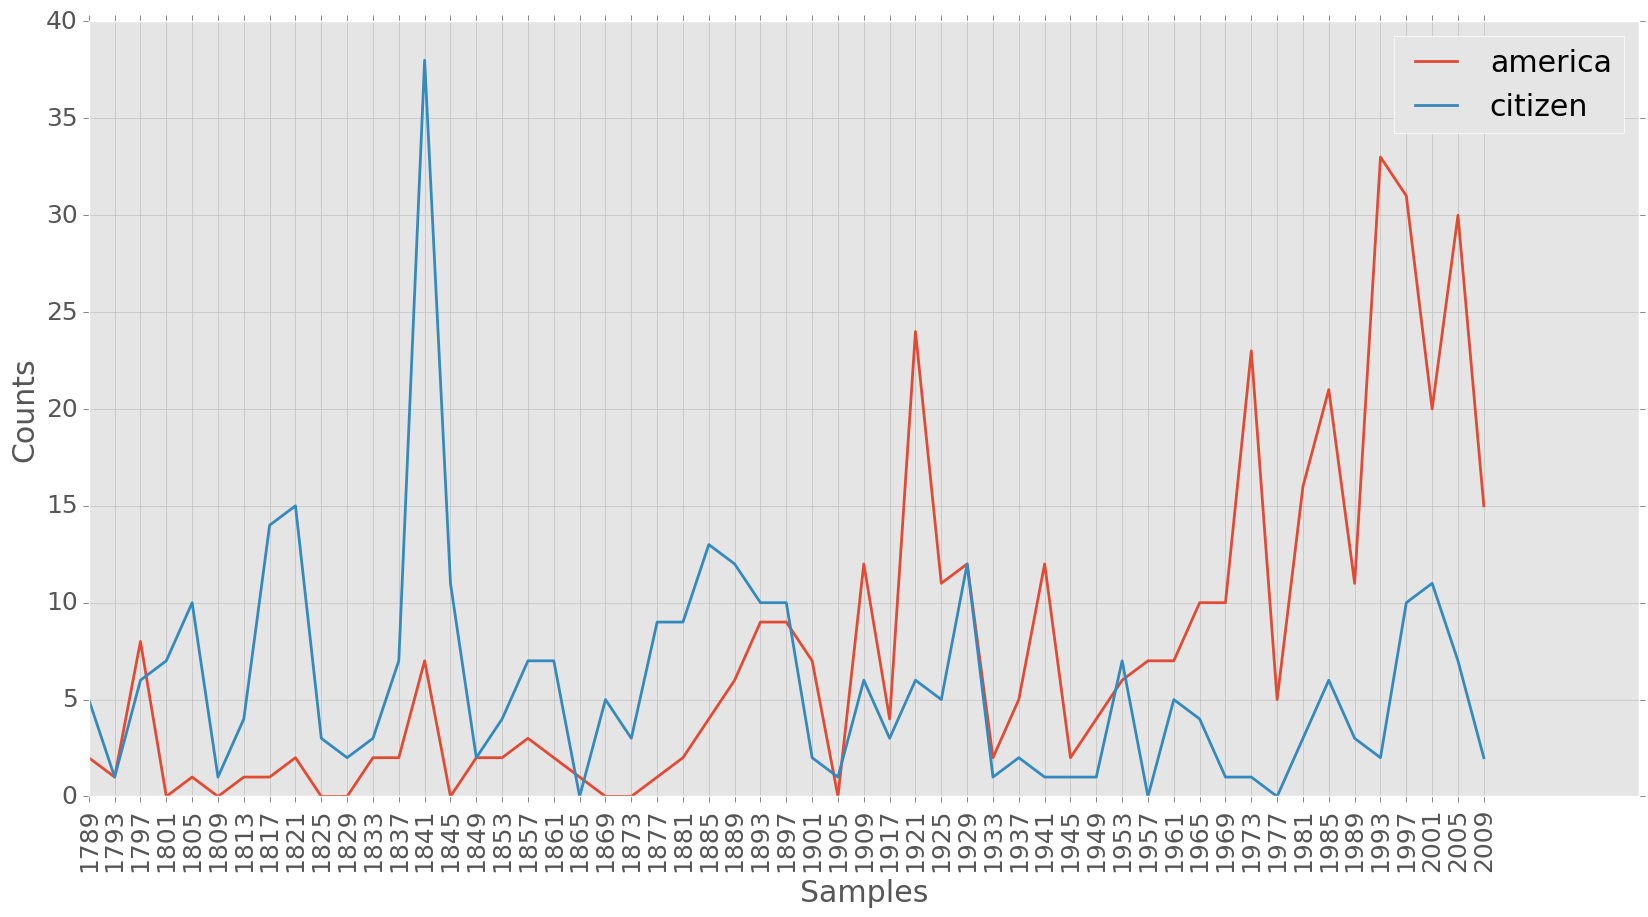

In [51]:
#creamos una distribución donde a cada palabra le asociamos el año, de manera que las palabras son aquellas del año
#correspondiente que empiezan o bien con america o bien con citizen
cfd=nltk.ConditionalFreqDist((palabra,fileid[:4])
                            for fileid in inaugural.fileids()
                            for w in inaugural.words(fileid)
                             for palabra in ['america','citizen']
                             if w.lower().startswith(palabra))
#representamos la gráfica
#tamaño de graficas
matplotlib.pyplot.figure(figsize=(20,10))
cfd.plot()

## Otros Corpus

Existen otros corpus que además incluyen información adicional, es decir, están anotados con etiquetas POS, entidades nombradas, estructuras sintácticas, roles semánticos, .... Se pueden consultar en http://nltk.org/data

Además nos encontramos con corpus en otros idiomas a parte del inglés.  

In [30]:
#Corpus en español, 
nltk.corpus.cess_esp.words()

[u'El', u'grupo', u'estatal', ...]

In [32]:
#otro corpus interesante para comparar idiomas es la declaración de los derechos humanos en 300 idiomas
nltk.corpus.udhr.fileids()

[u'Abkhaz-Cyrillic+Abkh',
 u'Abkhaz-UTF8',
 u'Achehnese-Latin1',
 u'Achuar-Shiwiar-Latin1',
 u'Adja-UTF8',
 u'Afaan_Oromo_Oromiffa-Latin1',
 u'Afrikaans-Latin1',
 u'Aguaruna-Latin1',
 u'Akuapem_Twi-UTF8',
 u'Albanian_Shqip-Latin1',
 u'Amahuaca',
 u'Amahuaca-Latin1',
 u'Amarakaeri-Latin1',
 u'Amuesha-Yanesha-UTF8',
 u'Arabela-Latin1',
 u'Arabic_Alarabia-Arabic',
 u'Asante-UTF8',
 u'Ashaninca-Latin1',
 u'Asheninca-Latin1',
 u'Asturian_Bable-Latin1',
 u'Aymara-Latin1',
 u'Balinese-Latin1',
 u'Bambara-UTF8',
 u'Baoule-UTF8',
 u'Basque_Euskara-Latin1',
 u'Batonu_Bariba-UTF8',
 u'Belorus_Belaruski-Cyrillic',
 u'Belorus_Belaruski-UTF8',
 u'Bemba-Latin1',
 u'Bengali-UTF8',
 u'Beti-UTF8',
 u'Bichelamar-Latin1',
 u'Bikol_Bicolano-Latin1',
 u'Bora-Latin1',
 u'Bosnian_Bosanski-Cyrillic',
 u'Bosnian_Bosanski-Latin2',
 u'Bosnian_Bosanski-UTF8',
 u'Breton-Latin1',
 u'Bugisnese-Latin1',
 u'Bulgarian_Balgarski-Cyrillic',
 u'Bulgarian_Balgarski-UTF8',
 u'Cakchiquel-Latin1',
 u'Campa_Pajonalino-Latin1',


In [33]:
nltk.corpus.udhr.words('Spanish_Espanol-Latin1')[11:]

[u'General', u'en', u'su', u'resoluci\xf3n', u'217', ...]

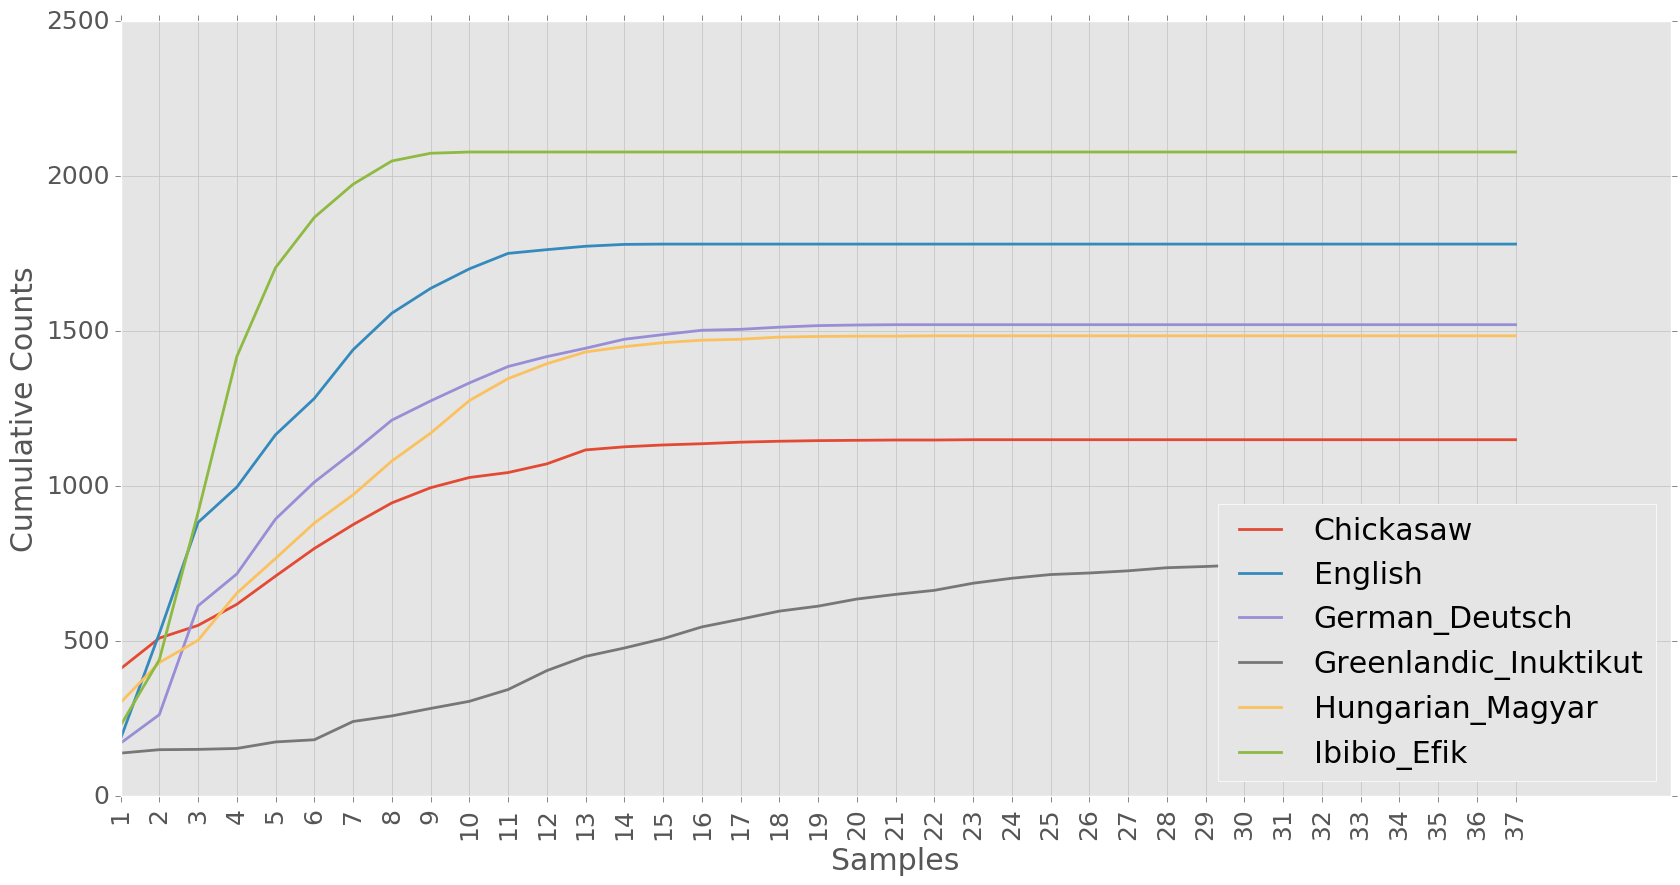

In [52]:
#cada declaración puede estar codificada en UTF-8 o Latin1.
from nltk.corpus import udhr

idiomas=['Chickasaw','English','German_Deutsch','Greenlandic_Inuktikut','Hungarian_Magyar','Ibibio_Efik']
cdf=nltk.ConditionalFreqDist((idioma,len(palabra))
                                for idioma in idiomas
                                 for palabra in udhr.words(idioma+'-Latin1'))

#tamaño de graficas
matplotlib.pyplot.figure(figsize=(20,10))
cdf.plot(cumulative=True)
#El resultado me da cuentas acumuladas y no porcentajes...., igual hay que configurar algo más?

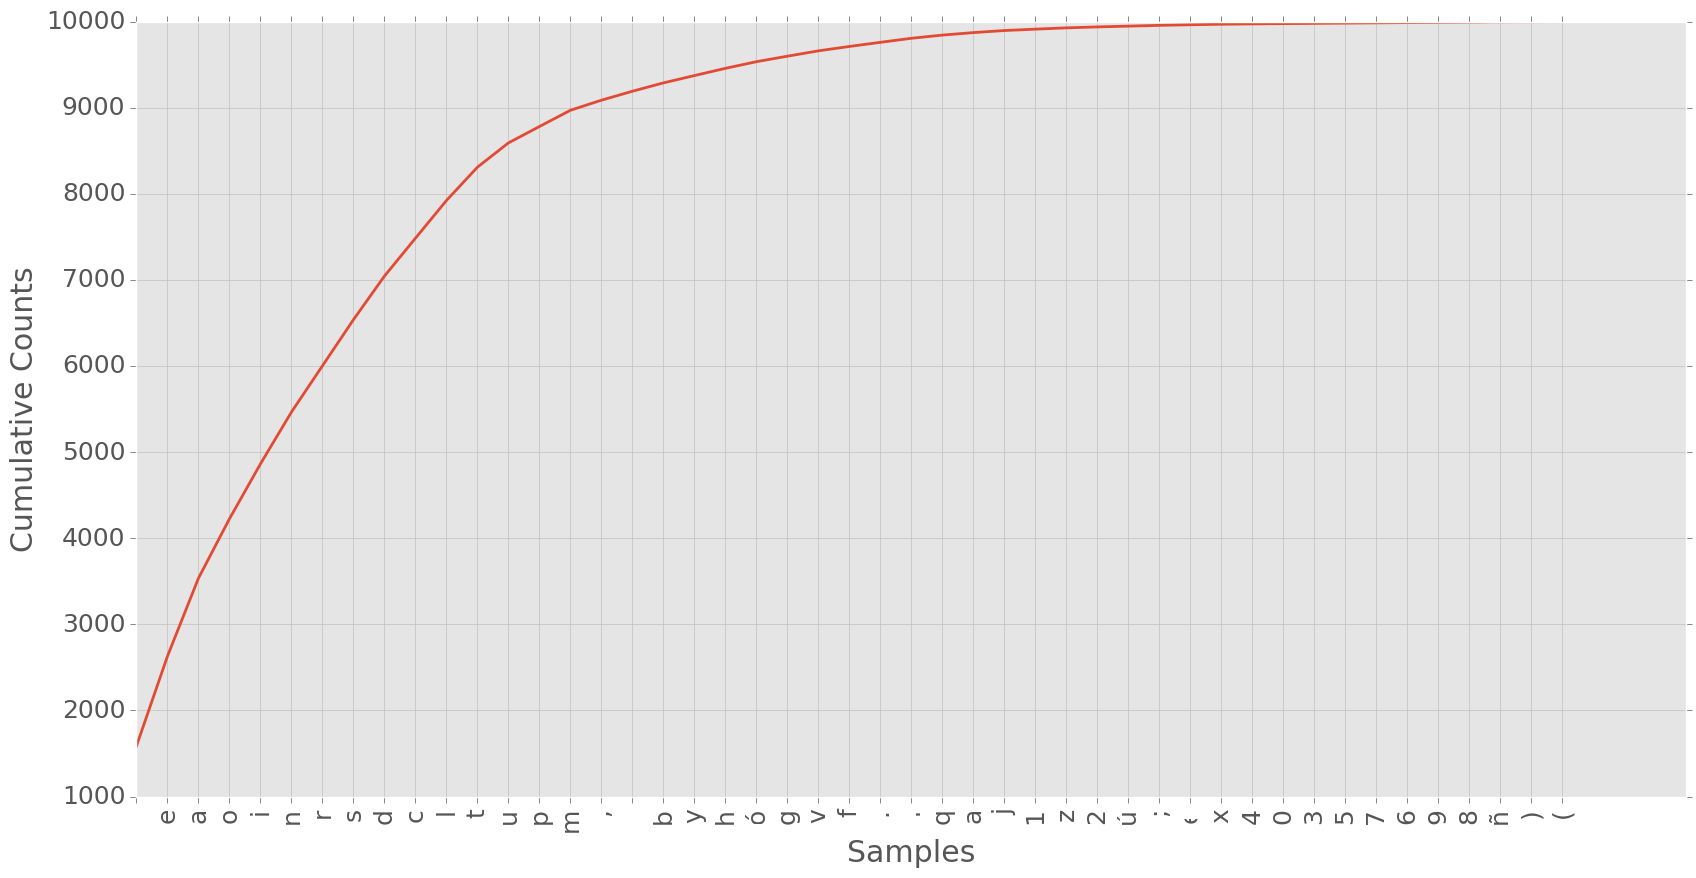

In [53]:
#escogemos un idioma y vemos la frecuencia de caracteres
cf=nltk.FreqDist(c.lower() for c in udhr.raw('Spanish_Espanol-Latin1'))
#tamaño de graficas
matplotlib.pyplot.figure(figsize=(20,10))
cf.plot(cumulative=True)

Además de utilizar cualquier corpus existente dentro de nltk podemos utilizar nuestro propio corpus, con el lector PlainTextCorpusReader. Hay que pasarle como parámetro la localización del directorio donde se encuentran los ficheros del corpus, en forma de lista como ['a/text1.txt','b/text2.txt']

In [55]:
#vamos a probar a cargar los tweets que descargue con Tweepy.
from nltk.corpus import PlaintextCorpusReader

raiz='C:\Users\Llanos\Documents\Python Scripts\GAPLN'

ficheros=['2017_10_17_captura_cat.txt','2017_10_17_captura_incendios.txt']

corpus=PlaintextCorpusReader(raiz,ficheros)

corpus.fileids()


['2017_10_17_captura_cat.txt', '2017_10_17_captura_incendios.txt']

In [56]:
#los ficheros tienen formato CSV así que leerlos como texto plano no es lo mejor, pero lo lee
corpus.words('2017_10_17_captura_cat.txt')

[u'DavilaYurmuary', u'|', u'RT', u'@', u'abc_es', u':', ...]

In [58]:
corpus.sents('2017_10_17_captura_cat.txt')[0]

[u'DavilaYurmuary',
 u'|',
 u'RT',
 u'@',
 u'abc_es',
 u':',
 u'\U0001f534',
 u'#',
 u'\xdaLTIMAHORA',
 u'Pastas',
 u'Gallo',
 u'traslada',
 u'su',
 u'sede',
 u'social',
 u'de',
 u'Catalu\xf1a',
 u'a',
 u'C\xf3rdoba',
 u'https',
 u'://',
 u't',
 u'.',
 u'co',
 u'/',
 u'jCCFa5dNHj',
 u'https',
 u'://',
 u't',
 u'.',
 u'co',
 u'/',
 u'094mvMy6po',
 u'|',
 u'0',
 u'|',
 u'0',
 u'|',
 u'Tue',
 u'Oct',
 u'17',
 u'11',
 u':',
 u'12',
 u':',
 u'03',
 u'+',
 u'0000',
 u'2017',
 u'|',
 u'es',
 u'|',
 u'None',
 u'luisfergegea',
 u'|',
 u'RT',
 u'@',
 u'oscar_puente_',
 u':',
 u'Europa',
 u'cierra',
 u'la',
 u'\xfaltima',
 u'puerta',
 u'del',
 u'mercado',
 u'com\xfan',
 u'a',
 u'una',
 u'Catalu\xf1a',
 u'independiente',
 u'y',
 u'desmiente',
 u'a',
 u'Junqueras',
 u'https',
 u'://',
 u't',
 u'.',
 u'co',
 u'/',
 u'pXg9o',
 u'\u2026|',
 u'0',
 u'|',
 u'0',
 u'|',
 u'Tue',
 u'Oct',
 u'17',
 u'11',
 u':',
 u'12',
 u':',
 u'03',
 u'+',
 u'0000',
 u'2017',
 u'|',
 u'es',
 u'|',
 u'Catalunya',
 u'Parti

# 2. Distribuciones condicionales
Ya se han visto varios ejemplos de distribuciones condicionales en el apartado anterior. Nos permiten dentro de un corpus dividido por varias categorias (género, autor,...) mantener distribuciones separadas por cada categoría. Luego nos permite el análisis sistemático por categorias.

Una distribución condicional necesita una lista de pares donde, cada elemento es acompañado por el valor de su categoria, es decir, su condición. 

In [69]:
from nltk.corpus import brown
#creamos una lista, donde cada palabra va asociada a su genero
genero_palabra=[(genero,palabra)
                   for genero in brown.categories()
                   for palabra in brown.words(categories=genero)]
#miramos la longitud de la lista
print len(genero_palabra)
#vemos las cuatro primeras parejas
print genero_palabra[:4]

1161192
[(u'adventure', u'Dan'), (u'adventure', u'Morgan'), (u'adventure', u'told'), (u'adventure', u'himself')]


In [70]:
#en base a esa lista creamos la distibución condicional
cfd=nltk.ConditionalFreqDist(genero_palabra)
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {u'adventure': FreqDist({u'fawn': 1,
                               u'aided': 1,
                               u'Poetry': 1,
                               u'yellow': 2,
                               u'four': 16,
                               u'woods': 2,
                               u'hanging': 5,
                               u'increase': 1,
                               u'pardon': 2,
                               u'attracted': 2,
                               u'electricity': 2,
                               u'gab': 1,
                               u'Western': 2,
                               u'Climbing': 1,
                               u'meadows': 3,
                               u'sinking': 1,
                               u'dell': 3,
                               u'forties': 3,
                               u'tantalizing': 1,
                               u'leisurely': 1,
                        

In [71]:
#vemos las condiciones, es decir las categorias de las palabras, que coincide con las categorias de brown
cfd.conditions()

[u'mystery',
 u'belles_lettres',
 u'humor',
 u'government',
 u'fiction',
 u'reviews',
 u'religion',
 u'romance',
 u'science_fiction',
 u'adventure',
 u'editorial',
 u'hobbies',
 u'lore',
 u'news',
 u'learned']

In [72]:
#veamos la distribución para un sólo genero
cfd['news']

FreqDist({u'sunbonnet': 1,
          u'Elevated': 1,
          u'narcotic': 2,
          u'four': 73,
          u'woods': 4,
          u'railing': 1,
          u'Until': 5,
          u'aggression': 1,
          u'marching': 2,
          u'increase': 24,
          u'eligible': 4,
          u'electricity': 1,
          u'$25-a-plate': 1,
          u'wheeled': 2,
          u'Casey': 6,
          u'all-county': 1,
          u'Belgians': 20,
          u'Western': 7,
          u'dependency': 2,
          u'1959-60': 1,
          u'Duhagon': 1,
          u'sinking': 1,
          u'1,119': 1,
          u'co-operation': 1,
          u'Famed': 1,
          u'regional': 2,
          u'Charitable': 1,
          u'appropriation': 2,
          u'yellow': 3,
          u'Old': 11,
          u'Heights': 1,
          u'bringing': 2,
          u'Policies': 2,
          u'prize': 5,
          u'Loen': 1,
          u'Publique': 2,
          u'wooden': 1,
          u'Loeb': 1,
          u'specialties': 1,
 

In [73]:
cfd['romance']

FreqDist({u'raining': 2,
          u'sitters': 1,
          u'yellow': 13,
          u'keno': 1,
          u'four': 8,
          u'Does': 2,
          u'railing': 1,
          u'ringlets': 1,
          u'self-pity': 2,
          u'snowing': 1,
          u'Myra': 24,
          u'Ronald': 3,
          u'Western': 2,
          u'lore': 1,
          u'portentous': 1,
          u'immature': 1,
          u'shaving': 1,
          u'Elec': 9,
          u'foul': 1,
          u'experimentally': 1,
          u'bringing': 3,
          u'prize': 1,
          u'wooden': 3,
          u'piling': 1,
          u'freckles': 2,
          u'persisted': 1,
          u'woods': 1,
          u'succession': 1,
          u'Paul': 1,
          u'Jerez': 1,
          u'straight': 13,
          u'Rachel': 16,
          u'tired': 11,
          u'hanging': 3,
          u'pulse': 2,
          u'elegant': 2,
          u'second': 15,
          u'valiant': 1,
          u'sailed': 1,
          u'scraped': 1,
          u'l

In [74]:
#cuales son las palabras más comúnes dentro de la categoria romance
cfd['romance'].most_common(20)

[(u',', 3899),
 (u'.', 3736),
 (u'the', 2758),
 (u'and', 1776),
 (u'to', 1502),
 (u'a', 1335),
 (u'of', 1186),
 (u'``', 1045),
 (u"''", 1044),
 (u'was', 993),
 (u'I', 951),
 (u'in', 875),
 (u'he', 702),
 (u'had', 692),
 (u'?', 690),
 (u'her', 651),
 (u'that', 583),
 (u'it', 573),
 (u'his', 559),
 (u'she', 496)]

In [75]:
#frecuencia de una palabra concreta en una categoria concreta.
cfd['romance']['could']

193

Ya hemos visto con anterioridad como mostrar una gráfica con los datos de la distribución mediante el comando `plot()`. También podemos mostrar los datos en una especie de tabla, tabulados.

In [77]:
#cogemos la distribución anterior que contaba la longitud de las palabras en varios idiomas,
# seleccionamos con conditions los idiomas, con sample es una lista de los tamaños que nos interesan 
# y con cumulative de forma acumulada,
cdf.tabulate(conditions=['English','German_Deutsch'],samples=range(10),cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


In [83]:
#dentro del corpus Brown seleccionar que días son más populares en la categoria de noticias y en la categoria de romance.
dias=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cfd.tabulate(conditions=['news','romance'],samples=dias)


           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


Se puede utilizar las distribuciones condicionales de frecuencias para crear tablas de bigramas. El truco está en tratar cada palabra como una condición, y creamos para cada una de ellas la consecuente distribución de palabras para las palabras siguientes. 

In [86]:
def generate_model(cfdist, palabra, num=15):
    '''Esta función se encarga de data una distribución condicional descrita y una palabra, generar tantas palabras
    como indica el parámetro num
    '''
    #ponemos un tope de palabras siguientes
    for i in range(num):
        #mostramos la palabra
        print palabra,
        #calculamos la siguiente palabram más popular
        palabra=cfdist[palabra].max()
        
#cogemos un texto
texto=nltk.corpus.genesis.words('english-kjv.txt')
#calculamos los bigramas de ese texto. Ya tenemos una lista de parejas, donde una palabra aparece acompañada de su siguiente
bigrams=nltk.bigrams(texto)
#creamos la distribución
cdf2=nltk.ConditionalFreqDist(bigrams)
cdf2['living']

FreqDist({u',': 1,
          u'.': 1,
          u'creature': 7,
          u'soul': 1,
          u'substance': 2,
          u'thing': 4})

In [87]:
#creamos el texto
generate_model(cdf2,'living')

living creature that he said , and the land of the land of the land


# 4. Recursos Léxicos
Un léxico o un recurso léxico es un conjunto de palabras junto con información como etiquetas POS o definiciones. Son textos secundarios que generalmente se construyen para enriquecer y ayudar con los textos. 

Una **entrada léxica** suele consisteir en un **lema (headword?)** seguido con la información adicional que lo describe. Dos palabras cuya escritura es la misma pero la definición es distinta son **homónimos**.

NLTK incluye algunos corpus que no son otra cosa que listas de palabras.

In [3]:
def palabras_poco_usuales(text):
    '''Función que localiza las palabras menos comunes en un texto en inglés'''
    #seleccionamos las palabras quitando los símbolos de puntuación y los números
    text_vocab=set(w.lower() for w in text if w.isalpha())
    #cargamos un diccionario de inglés
    english_vocab=set(w.lower() for w in nltk.corpus.words.words())
    #restamos las palabras comúnes del diccionario a las que encontramos en el texto
    no_usuales=text_vocab - english_vocab
    return sorted(no_usuales)

palabras_poco_usuales(nltk.corpus.gutenberg.words('austen-sense.txt'))

[u'abbeyland',
 u'abhorred',
 u'abilities',
 u'abounded',
 u'abridgement',
 u'abused',
 u'abuses',
 u'accents',
 u'accepting',
 u'accommodations',
 u'accompanied',
 u'accounted',
 u'accounts',
 u'accustomary',
 u'aches',
 u'acknowledging',
 u'acknowledgment',
 u'acknowledgments',
 u'acquaintances',
 u'acquiesced',
 u'acquitted',
 u'acquitting',
 u'acted',
 u'actions',
 u'adapted',
 u'adding',
 u'additions',
 u'addressed',
 u'addresses',
 u'addressing',
 u'adhering',
 u'adieus',
 u'adjusting',
 u'administering',
 u'admirers',
 u'admires',
 u'admitting',
 u'adorned',
 u'advances',
 u'advantages',
 u'affairs',
 u'affections',
 u'affects',
 u'affixed',
 u'afflictions',
 u'afforded',
 u'affording',
 u'ages',
 u'agitated',
 u'agonies',
 u'ailments',
 u'aimed',
 u'alarms',
 u'alienated',
 u'alighted',
 u'alleged',
 u'allenham',
 u'allowances',
 u'allowed',
 u'allowing',
 u'alluded',
 u'alterations',
 u'altered',
 u'altering',
 u'amended',
 u'amounted',
 u'amusements',
 u'ankles',
 u'annamaria

In [4]:
# quizas una mejora seria quitar los plurales, no creo que adjust o adults sean muy poco usuales
palabras_poco_usuales(nltk.corpus.nps_chat.words())

[u'aaaaaaaaaaaaaaaaa',
 u'aaahhhh',
 u'abortions',
 u'abou',
 u'abourted',
 u'abs',
 u'ack',
 u'acros',
 u'actualy',
 u'adams',
 u'adds',
 u'adduser',
 u'adjusts',
 u'adoted',
 u'adreniline',
 u'ads',
 u'adults',
 u'afe',
 u'affairs',
 u'affari',
 u'affects',
 u'afk',
 u'agaibn',
 u'ages',
 u'aggravated',
 u'agurlwithbigguns',
 u'ahah',
 u'ahahah',
 u'ahahh',
 u'ahahha',
 u'ahh',
 u'ahhah',
 u'ahhahahaha',
 u'ahhh',
 u'ahhhh',
 u'ahhhhhh',
 u'ahhhhhhhhhhhhhh',
 u'aiiiiiiiiiiiiiiiiiiiiiiii',
 u'aiken',
 u'aime',
 u'akdt',
 u'akon',
 u'akron',
 u'akst',
 u'aligator',
 u'allergies',
 u'allo',
 u'allowed',
 u'aloha',
 u'alohaaa',
 u'alohas',
 u'alot',
 u'alotta',
 u'alternatives',
 u'alterz',
 u'alwys',
 u'alzheimers',
 u'amazingness',
 u'americans',
 u'anithing',
 u'ans',
 u'answering',
 u'answers',
 u'antidepressants',
 u'anygirl',
 u'anymore',
 u'anythin',
 u'anytime',
 u'anyyyyyyyyyyyyyyyyy',
 u'aok',
 u'apoligize',
 u'appearently',
 u'appears',
 u'applaudes',
 u'appleton',
 u'appologi

También existe un corpus de **stopwords**, es decir palabras muy frecuentes en el idioma como *the*, *to* o *also* que se suelen eliminar antes de procesar el documento. Generalmente son palabras que tienen poco contenido léxico y su presencia en el texto evita que se caracterice el texto correctamente para su comparación.

In [5]:
from nltk.corpus import stopwords

stopwords.words('english')

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all

In [6]:
stopwords.words('spanish')

[u'de',
 u'la',
 u'que',
 u'el',
 u'en',
 u'y',
 u'a',
 u'los',
 u'del',
 u'se',
 u'las',
 u'por',
 u'un',
 u'para',
 u'con',
 u'no',
 u'una',
 u'su',
 u'al',
 u'lo',
 u'como',
 u'm\xe1s',
 u'pero',
 u'sus',
 u'le',
 u'ya',
 u'o',
 u'este',
 u's\xed',
 u'porque',
 u'esta',
 u'entre',
 u'cuando',
 u'muy',
 u'sin',
 u'sobre',
 u'tambi\xe9n',
 u'me',
 u'hasta',
 u'hay',
 u'donde',
 u'quien',
 u'desde',
 u'todo',
 u'nos',
 u'durante',
 u'todos',
 u'uno',
 u'les',
 u'ni',
 u'contra',
 u'otros',
 u'ese',
 u'eso',
 u'ante',
 u'ellos',
 u'e',
 u'esto',
 u'm\xed',
 u'antes',
 u'algunos',
 u'qu\xe9',
 u'unos',
 u'yo',
 u'otro',
 u'otras',
 u'otra',
 u'\xe9l',
 u'tanto',
 u'esa',
 u'estos',
 u'mucho',
 u'quienes',
 u'nada',
 u'muchos',
 u'cual',
 u'poco',
 u'ella',
 u'estar',
 u'estas',
 u'algunas',
 u'algo',
 u'nosotros',
 u'mi',
 u'mis',
 u't\xfa',
 u'te',
 u'ti',
 u'tu',
 u'tus',
 u'ellas',
 u'nosotras',
 u'vosostros',
 u'vosostras',
 u'os',
 u'm\xedo',
 u'm\xeda',
 u'm\xedos',
 u'm\xedas',
 u

In [7]:
def contenido_fraccion(text):
    '''Esta función calcula el porcentaje de los tokens que son palabras significativas'''
    #cargamos las stopwords
    stopwords_list=stopwords.words('english')
    #seleccionamos las palabras en el texto que no están en las stopwords, Así también tenemos en cuenta otros tokens.
    #Igual habría que modificarlo para que contará solo palabras, sin números ni signos de puntuación
    content=[w for w in text if w.lower() not in stopwords_list]
    return len(content)/len(text)

contenido_fraccion(nltk.corpus.reuters.words()) #curiosidad me da distinto que en el libro, tengo que ir actualizando mis corpus

0.735240435097661

Vamos a usar las listas de palabras para resolver un puzzle de letras, donde tenemos un cuadrado como el siguiente

| E | G | I |
|---|---|---|
| V | **R** | V |
| O | N | L |

Tenemos que generar palabras en inglés de 4 letras que al menos contengan la R y utilicen el resto de las letras del cuadrado. Al menos debemos generar una palabra de 9 letras. Nada de plurales, nada de palabras extranjeras, nada de nombres propios. 

In [8]:
# la distribución de frecuencias nos permite comprobar cuantas veces aparece una letra y por tanto cuantas veces
#la podemos usar
letras=nltk.FreqDist('egivrvonl')
obligatoria='r'
#cargamos las palabras válidas
palabras=nltk.corpus.words.words()
#buscamos palabras en el diccionario que al menos tengan longitud 6, que contengan la letra obligatoria
# y que su distribución de letras sea un subconjunto de la distribución de letras del cuadrado
[w for w in palabras if len(w)>=6 and obligatoria in w and nltk.FreqDist(w)<=letras]


[u'glover',
 u'gorlin',
 u'govern',
 u'grovel',
 u'ignore',
 u'involver',
 u'lienor',
 u'linger',
 u'longer',
 u'lovering',
 u'noiler',
 u'overling',
 u'region',
 u'renvoi',
 u'revolving',
 u'ringle',
 u'roving',
 u'violer',
 u'virole']

In [9]:
#otra lista interesante: nombres propios clasificado por hombre o mujer
nombres=nltk.corpus.names
nombres.fileids()

[u'female.txt', u'male.txt']

In [10]:
nombres_masc=nombres.words('male.txt')
nombres_fem=nombres.words('female.txt')
#nombres en  ambas categorias
[w for w in nombres_masc if w in nombres_fem]

[u'Abbey',
 u'Abbie',
 u'Abby',
 u'Addie',
 u'Adrian',
 u'Adrien',
 u'Ajay',
 u'Alex',
 u'Alexis',
 u'Alfie',
 u'Ali',
 u'Alix',
 u'Allie',
 u'Allyn',
 u'Andie',
 u'Andrea',
 u'Andy',
 u'Angel',
 u'Angie',
 u'Ariel',
 u'Ashley',
 u'Aubrey',
 u'Augustine',
 u'Austin',
 u'Averil',
 u'Barrie',
 u'Barry',
 u'Beau',
 u'Bennie',
 u'Benny',
 u'Bernie',
 u'Bert',
 u'Bertie',
 u'Bill',
 u'Billie',
 u'Billy',
 u'Blair',
 u'Blake',
 u'Bo',
 u'Bobbie',
 u'Bobby',
 u'Brandy',
 u'Brett',
 u'Britt',
 u'Brook',
 u'Brooke',
 u'Brooks',
 u'Bryn',
 u'Cal',
 u'Cam',
 u'Cammy',
 u'Carey',
 u'Carlie',
 u'Carlin',
 u'Carmine',
 u'Carroll',
 u'Cary',
 u'Caryl',
 u'Casey',
 u'Cass',
 u'Cat',
 u'Cecil',
 u'Chad',
 u'Chris',
 u'Chrissy',
 u'Christian',
 u'Christie',
 u'Christy',
 u'Clair',
 u'Claire',
 u'Clare',
 u'Claude',
 u'Clem',
 u'Clemmie',
 u'Cody',
 u'Connie',
 u'Constantine',
 u'Corey',
 u'Corrie',
 u'Cory',
 u'Courtney',
 u'Cris',
 u'Daffy',
 u'Dale',
 u'Dallas',
 u'Dana',
 u'Dani',
 u'Daniel',
 u'Dann

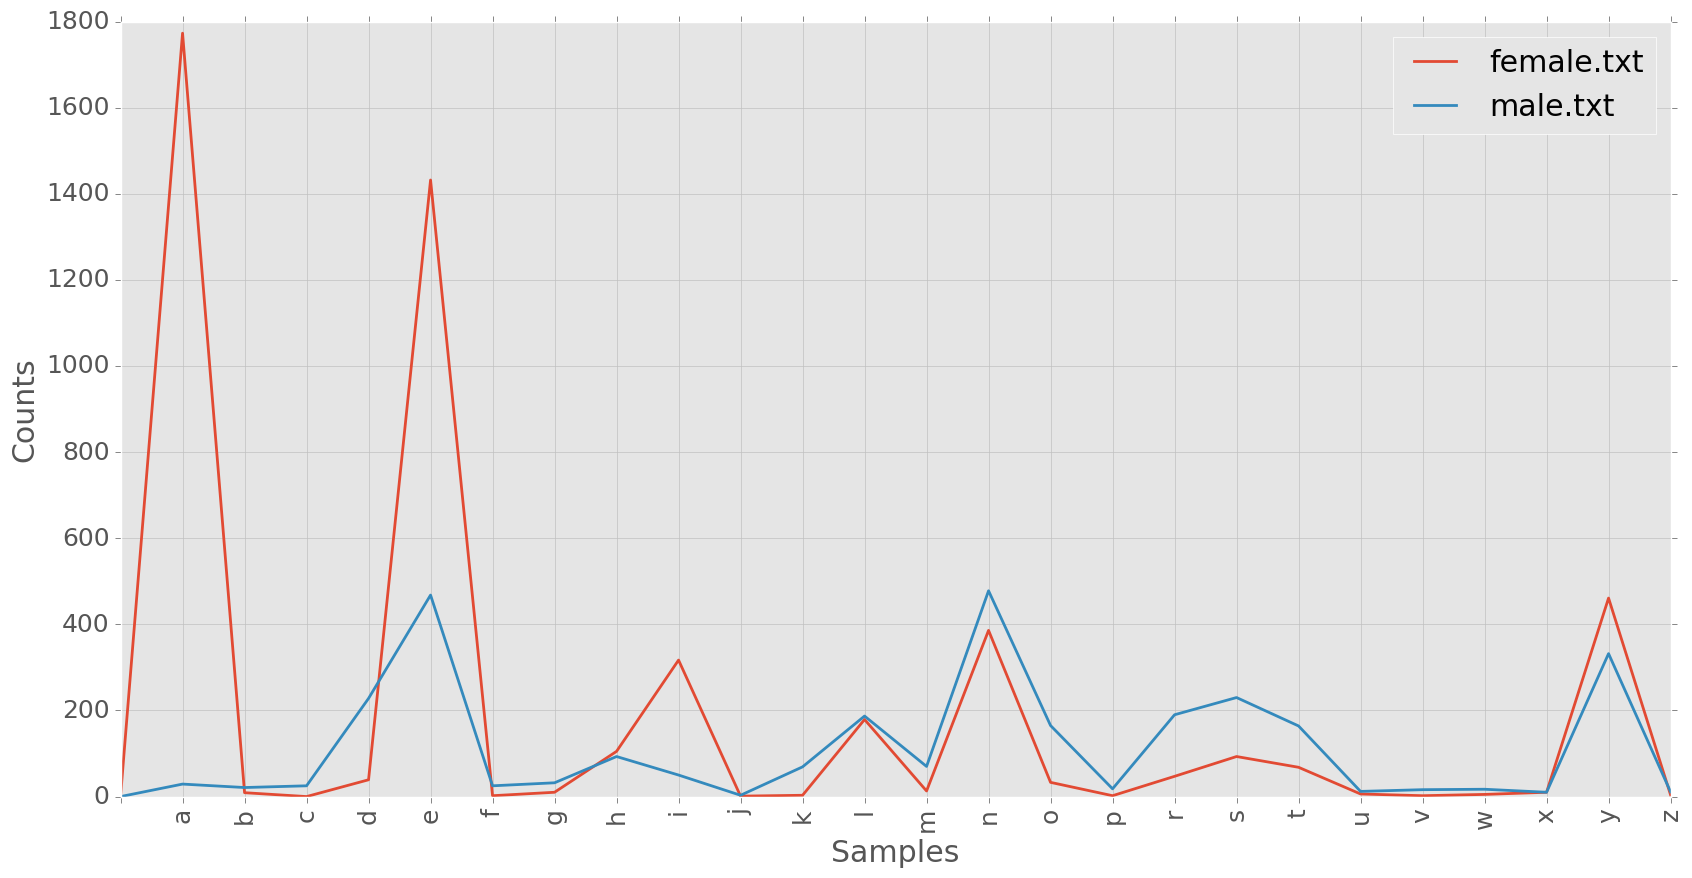

In [13]:
#¿cuál es la letra más popular para el inicio de nombres?
cfd=nltk.ConditionalFreqDist((fid,name[-1]) 
                             for fid in nltk.corpus.names.fileids() 
                             for name in  nltk.corpus.names.words(fid))
#tamaño de graficas
matplotlib.pyplot.figure(figsize=(20,10))
cfd.plot()

## Diccionarios de pronunciación

Existen recursos léxicos más ricos basados en tablas donde cada fila es una palabra que contiene diversas propiedades. 

In [14]:
entradas=nltk.corpus.cmudict.entries()
len(entradas)

133737

In [15]:
for e in entradas[42371:42379]:
    #por cada palabra ofrece su traducción fonética en una codificación llamada Arpabet
    print e

(u'fir', [u'F', u'ER1'])
(u'fire', [u'F', u'AY1', u'ER0'])
(u'fire', [u'F', u'AY1', u'R'])
(u'firearm', [u'F', u'AY1', u'ER0', u'AA2', u'R', u'M'])
(u'firearm', [u'F', u'AY1', u'R', u'AA2', u'R', u'M'])
(u'firearms', [u'F', u'AY1', u'ER0', u'AA2', u'R', u'M', u'Z'])
(u'firearms', [u'F', u'AY1', u'R', u'AA2', u'R', u'M', u'Z'])
(u'fireball', [u'F', u'AY1', u'ER0', u'B', u'AO2', u'L'])


In [17]:
#vamos a procesar por una parte la palabra y por otra su pronunciación
for palabra,fonema in entradas:
    #si la palabra contiene tres fonemas
    if len(fonema)==3:
        #leemos cada fonema por separado
        f1,f2,f3=fonema
        #si el primero es una P y termina en T
        if f1=='P' and f3=='T':
            #mostramos la palabra y el fonema central
            print palabra, f2, '\t',
            

pait EY1 	pat AE1 	pate EY1 	patt AE1 	peart ER1 	peat IY1 	peet IY1 	peete IY1 	pert ER1 	pet EH1 	pete IY1 	pett EH1 	piet IY1 	piette IY1 	pit IH1 	pitt IH1 	pot AA1 	pote OW1 	pott AA1 	pout AW1 	puett UW1 	purt ER1 	put UH1 	putt AH1 	

In [19]:
#otro ejemplo, vamos a buscar palabras cuyo sonido rime con la palabra nick
silabas=['N','IH0','K','S']
#busca palabras cuyo último fonema sea alguno de los de la lista
[w for w,p in entradas if p[-4:]==silabas]


[u"atlantic's",
 u'audiotronics',
 u'avionics',
 u'beatniks',
 u'calisthenics',
 u'centronics',
 u'chamonix',
 u'chetniks',
 u"clinic's",
 u'clinics',
 u'conics',
 u'conics',
 u'cryogenics',
 u'cynics',
 u'diasonics',
 u"dominic's",
 u'ebonics',
 u'electronics',
 u"electronics'",
 u"endotronics'",
 u'endotronics',
 u'enix',
 u'environics',
 u'ethnics',
 u'eugenics',
 u'fibronics',
 u'flextronics',
 u'harmonics',
 u'hispanics',
 u'histrionics',
 u'identics',
 u'ionics',
 u'kibbutzniks',
 u'lasersonics',
 u'lumonics',
 u'mannix',
 u'mechanics',
 u"mechanics'",
 u'microelectronics',
 u'minix',
 u'minnix',
 u'mnemonics',
 u'mnemonics',
 u'molonicks',
 u'mullenix',
 u'mullenix',
 u'mullinix',
 u'mulnix',
 u"munich's",
 u'nucleonics',
 u'onyx',
 u'organics',
 u"panic's",
 u'panics',
 u'penix',
 u'pennix',
 u'personics',
 u'phenix',
 u"philharmonic's",
 u'phoenix',
 u'phonics',
 u'photronics',
 u'pinnix',
 u'plantronics',
 u'pyrotechnics',
 u'refuseniks',
 u"resnick's",
 u'respironics',
 u'sc

In [21]:
#¿Qué hacen los siguientes ejercicios?
#En este caso se busca palabras que en la forma escrita terminan en n pero no se pronuncia, es decir es muda, 
#porque se pronuncia al final una M, que vemos es la letra anterior en las letras de la palabra
[w for w, pron in entradas if pron[-1]=='M' and w[-1]=='n']

[u'autumn', u'column', u'condemn', u'damn', u'goddamn', u'hymn', u'solemn']

In [24]:
#buscamos palabras que inicialmente se escriban con una letra distinta a la n pero esa letra no se pronuncie, sea muda
sorted(set(w[:2] for w,pron in entradas if pron[0]=='N' and w[0]!='n'))

[u'gn', u'kn', u'mn', u'pn']

Los fonemas suelen contener digitos que indican el acento siento 1 el acento primario, 2 el acento secundaria y 0 sin acento. De forma que podemos buscar palabras con cierta entonación en el diccionario.

In [25]:
def acento(pron):
    '''Estraemos de una pronunciación el ritmo de acentos'''
    return [c for f in pron 
              for c in f if c.isdigit()]

[w for w,p in entradas if acento(p)==['0','1','0','2','0']]

[u'abbreviated',
 u'abbreviated',
 u'abbreviating',
 u'accelerated',
 u'accelerating',
 u'accelerator',
 u'accelerators',
 u'accentuated',
 u'accentuating',
 u'accommodated',
 u'accommodating',
 u'accommodative',
 u'accumulated',
 u'accumulating',
 u'accumulative',
 u'accumulator',
 u'accumulators',
 u'accusatory',
 u'adenovirus',
 u'adjudicated',
 u'adjudicating',
 u'administrating',
 u'administrative',
 u'administrator',
 u"administrators'",
 u"administrator's",
 u'administrators',
 u'adulterated',
 u'adventurism',
 u'adventurism',
 u'affiliated',
 u'affiliated',
 u"affiliated's",
 u'affiliating',
 u'alleviated',
 u'alleviated',
 u'alleviating',
 u'alliteration',
 u'alliterative',
 u'amalgamated',
 u"amalgamated's",
 u'amalgamating',
 u'ameliorated',
 u'ameridata',
 u'amoxicillin',
 u'anachronism',
 u'anachronisms',
 u'annihilated',
 u'annihilating',
 u'antagonism',
 u'antagonisms',
 u'antagonizing',
 u'anticipated',
 u'anticipated',
 u'anticipating',
 u'apologizes',
 u'apologizing',

In [26]:
[w for w,p in entradas if acento(p)==['0','2','0','1','0']]

[u'abbreviation',
 u'abbreviations',
 u'abomination',
 u'abortifacient',
 u'abortifacients',
 u'academicians',
 u'accommodation',
 u'accommodations',
 u'accreditation',
 u'accreditations',
 u'accumulation',
 u'accumulations',
 u'acetylcholine',
 u'acetylcholine',
 u'adjudication',
 u'administration',
 u"administration's",
 u'administrations',
 u"administrations'",
 u'aduliadae',
 u'adulteration',
 u'affiliation',
 u'affiliations',
 u'aficionados',
 u'agglomeration',
 u'ahasuerus',
 u'ajinomoto',
 u'alleviation',
 u'amalgamation',
 u'ambrosiano',
 u'amelioration',
 u'americana',
 u"americana's",
 u'americanas',
 u'americano',
 u'americanos',
 u'anachronistic',
 u'anencephalic',
 u'annihilation',
 u'antagonistic',
 u'anticipation',
 u'anticipations',
 u'apocalyptic',
 u'apologetic',
 u'apotheosis',
 u'appreciation',
 u'appropriation',
 u'appropriations',
 u'approximation',
 u'approximations',
 u'aristocratic',
 u'arunachalam',
 u'assassination',
 u'assassinations',
 u'assimilation',
 u'a

In [29]:
#podemos apoyarnos en este diccionario y las frecuencias condicionales para encontrar conjuntos mínimos de palabras. 
#seleccionamos palabras cuya pronunciación sea de tres sonidos y empiecen por p
p3=[(p[0]+"-"+p[2],w)
       for w,p in entradas if p[0]=='P' and len(p)==3]
#creamos la distribución condicional
cfd=nltk.ConditionalFreqDist(p3)
#para cada forma p...sonido
for template in sorted(cfd.conditions()):
    #si hay más de diez palabras que usan ese patron
    if len(cfd[template])>10:
        #obtenemos las palabras
        palabras=sorted(cfd[template])
        #las unimos en una cadena
        lista_palabras=' '.join(palabras)
        #las mostramos
        print template, lista_palabras[:70],'...'

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit ...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk  ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl ...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn ...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop ...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour ...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p ...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett ...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh ...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's  ...


In [30]:
#también podemos consultar el diccionario
pdict=nltk.corpus.cmudict.dict()
pdict['fire']

[[u'F', u'AY1', u'ER0'], [u'F', u'AY1', u'R']]

In [31]:
#si una entrada no está recibimos un error
pdict['blog']

KeyError: 'blog'

In [32]:
#podemos añadir palabras, ojo se añaden al objeto no se añaden al corpus de la NLTK
pdict['blog']=[['B','L','AA1','G']]
pdict['blog']

[['B', 'L', 'AA1', 'G']]

In [34]:
#también podemos usarlo para un traductor text to speech
text=['natural','speech','processing']
[ph for w in text for ph in pdict[w][0]]

[u'N',
 u'AE1',
 u'CH',
 u'ER0',
 u'AH0',
 u'L',
 u'S',
 u'P',
 u'IY1',
 u'CH',
 u'P',
 u'R',
 u'AA1',
 u'S',
 u'EH0',
 u'S',
 u'IH0',
 u'NG']

## Comparación de listas de palabras

El corpus swadesh contiene cerca de 200 palabras frecuentes en diversos idiomas. Los idiomas se identifican usando el código ISO 639 de dos letras. Por ejemplo el español es *es* y el ingles *en*.

In [35]:
from nltk.corpus import swadesh
swadesh.fileids()

[u'be',
 u'bg',
 u'bs',
 u'ca',
 u'cs',
 u'cu',
 u'de',
 u'en',
 u'es',
 u'fr',
 u'hr',
 u'it',
 u'la',
 u'mk',
 u'nl',
 u'pl',
 u'pt',
 u'ro',
 u'ru',
 u'sk',
 u'sl',
 u'sr',
 u'sw',
 u'uk']

In [36]:
swadesh.words('en')

[u'I',
 u'you (singular), thou',
 u'he',
 u'we',
 u'you (plural)',
 u'they',
 u'this',
 u'that',
 u'here',
 u'there',
 u'who',
 u'what',
 u'where',
 u'when',
 u'how',
 u'not',
 u'all',
 u'many',
 u'some',
 u'few',
 u'other',
 u'one',
 u'two',
 u'three',
 u'four',
 u'five',
 u'big',
 u'long',
 u'wide',
 u'thick',
 u'heavy',
 u'small',
 u'short',
 u'narrow',
 u'thin',
 u'woman',
 u'man (adult male)',
 u'man (human being)',
 u'child',
 u'wife',
 u'husband',
 u'mother',
 u'father',
 u'animal',
 u'fish',
 u'bird',
 u'dog',
 u'louse',
 u'snake',
 u'worm',
 u'tree',
 u'forest',
 u'stick',
 u'fruit',
 u'seed',
 u'leaf',
 u'root',
 u'bark (from tree)',
 u'flower',
 u'grass',
 u'rope',
 u'skin',
 u'meat',
 u'blood',
 u'bone',
 u'fat (noun)',
 u'egg',
 u'horn',
 u'tail',
 u'feather',
 u'hair',
 u'head',
 u'ear',
 u'eye',
 u'nose',
 u'mouth',
 u'tooth',
 u'tongue',
 u'fingernail',
 u'foot',
 u'leg',
 u'knee',
 u'hand',
 u'wing',
 u'belly',
 u'guts',
 u'neck',
 u'back',
 u'breast',
 u'heart',
 u'li

In [38]:
#podemos a las palabras de varios idiomas mediante el método entries, conviertiendo el resultado en un diccionario
#diccionario frances-ingles
fr2en=swadesh.entries(['fr','en'])
fr2en

[(u'je', u'I'),
 (u'tu, vous', u'you (singular), thou'),
 (u'il', u'he'),
 (u'nous', u'we'),
 (u'vous', u'you (plural)'),
 (u'ils, elles', u'they'),
 (u'ceci', u'this'),
 (u'cela', u'that'),
 (u'ici', u'here'),
 (u'l\xe0', u'there'),
 (u'qui', u'who'),
 (u'quoi', u'what'),
 (u'o\xf9', u'where'),
 (u'quand', u'when'),
 (u'comment', u'how'),
 (u'ne...pas', u'not'),
 (u'tout', u'all'),
 (u'plusieurs', u'many'),
 (u'quelques', u'some'),
 (u'peu', u'few'),
 (u'autre', u'other'),
 (u'un', u'one'),
 (u'deux', u'two'),
 (u'trois', u'three'),
 (u'quatre', u'four'),
 (u'cinq', u'five'),
 (u'grand', u'big'),
 (u'long', u'long'),
 (u'large', u'wide'),
 (u'\xe9pais', u'thick'),
 (u'lourd', u'heavy'),
 (u'petit', u'small'),
 (u'court', u'short'),
 (u'\xe9troit', u'narrow'),
 (u'mince', u'thin'),
 (u'femme', u'woman'),
 (u'homme', u'man (adult male)'),
 (u'homme', u'man (human being)'),
 (u'enfant', u'child'),
 (u'femme, \xe9pouse', u'wife'),
 (u'mari, \xe9poux', u'husband'),
 (u'm\xe8re', u'mother')

In [40]:
traductor=dict(fr2en)
traductor['chien']

u'dog'

In [41]:
traductor['jeter']

u'throw'

In [42]:
#vamos a añadir dos traductores
de2en=swadesh.entries(['de','en'])
es2en=swadesh.entries(['es','en'])

traductor.update(de2en)
traductor.update(es2en)

print traductor['Hund'], traductor['perro']

dog dog


In [43]:
#también podemos comparar idiomas
idiomas=['en','de','nl','es','fr','pt','la']
#para la entradas desde 139 hasta 142 del diccionario
for i in [139,140,141,142]:
    #muestra la entrada i para todos los idiomas de la lista
    print swadesh.entries(idiomas)[i]

(u'say', u'sagen', u'zeggen', u'decir', u'dire', u'dizer', u'dicere')
(u'sing', u'singen', u'zingen', u'cantar', u'chanter', u'cantar', u'canere')
(u'play', u'spielen', u'spelen', u'jugar', u'jouer', u'jogar, brincar', u'ludere')
(u'float', u'schweben', u'zweven', u'flotar', u'flotter', u'flutuar, boiar', u'fluctuare')


## Shoebox y Toolbox

Toolbox es una popular herramienta conocida con anterioridad como Shoebox que permite crear lexicones como si fueran tarjetas en cajas de zapatos. https://software.sil.org/toolbox/
Dado que cada lingüista puede añadir los campos que desee, no es tan sencillo de procesar como otros lexicones vistos.

In [3]:
#ejemplo con el lenguaje Rotokas
from nltk.corpus import toolbox

toolbox.entries('rotokas.dic')

[(u'kaa',
  [(u'ps', u'V'),
   (u'pt', u'A'),
   (u'ge', u'gag'),
   (u'tkp', u'nek i pas'),
   (u'dcsv', u'true'),
   (u'vx', u'1'),
   (u'sc', u'???'),
   (u'dt', u'29/Oct/2005'),
   (u'ex', u'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   (u'xp', u'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   (u'xe', u'Apoka is gagging from food while talking.')]),
 (u'kaa',
  [(u'ps', u'V'),
   (u'pt', u'B'),
   (u'ge', u'strangle'),
   (u'tkp', u'pasim nek'),
   (u'arg', u'O'),
   (u'vx', u'2'),
   (u'dt', u'07/Oct/2006'),
   (u'ex', u'Rera rauroro rera kaarevoi.'),
   (u'xp', u'Em i holim pas em na nekim em.'),
   (u'xe', u'He is holding him and strangling him.'),
   (u'ex',
    u'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   (u'xp',
    u'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   (u'xe',
    u"They strangled the man's neck with rope because he was very stubborn and arrogant."),
   (u'ex',
    u'Oirato okoearo kaaivoi iro

# WordNet

WordNet (https://wordnet.princeton.edu/) es un diccionario semantico orientado al inglés similar al tradicional thesaurus (http://www.thesaurus.com/). NLTK incluye una versión de WordNet.

## Definición y sinónimos

Dos palabras son **sinónimos** si su definición es la misma aunque su escritura sea distinta. Por ejemplo *coche* y *automovil*. Es decir, son palabras intercambiables en una sentencia sin que la sentencia cambie de significado.

El método synset devuelve un conjunto de sinónimos de la palabra que buscamos (o también lemas).

In [8]:
from nltk.corpus import wordnet as wn

#vamo a comprobar la palabra motorcar. Nos devuelve un sólo significado car, que es un nombre (n) y donde el 01 indica 
#que es la primera definición. 

wn.synsets('motorcar')

[Synset('car.n.01')]

In [9]:
#buscamos para el synset car todos sus lemas, es decir todas las palabras que pueden significar lo mismo que car
wn.synset('car.n.01').lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']

In [12]:
#podemos además usarlo en otros idiomas como traductor
wn.synset('car.n.01').lemma_names('spa')

[u'auto',
 u'autom\xf3vil',
 u'carro',
 u'coche',
 u'm\xe1quina',
 u'turismo',
 u'veh\xedculo']

In [10]:
#además todoslos synset vienen con una definición y ejemplos
wn.synset('car.n.01').definition()

u'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [11]:
wn.synset('car.n.01').examples()

[u'he needs a car to get to work']

Desde el punto de vista de trabajar con textos, las definiciones no son muy útiles. Nos es más práctico trabajar con synsets. Para eliminar ambiguedades podemos identificar estás palabras así: car.n.01.automobile, car.n.01.motorcar. Luego el par de un synset con una palabra se denomina **lema**

In [14]:
#vemos los lemas que se derivan del synset de cat
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [15]:
#cogemos un lema
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [16]:
#mostramos el synset asociado
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [17]:
#mostramos la palabra asociada
wn.lemma('car.n.01.automobile').name()

u'automobile'

In [24]:
#vemos que por ejemplo la palabra 'car' resulta bastante más ambigua que automobile
for synset in wn.synsets('car'):
    print synset.lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']
[u'car', u'railcar', u'railway_car', u'railroad_car']
[u'car', u'gondola']
[u'car', u'elevator_car']
[u'cable_car', u'car']


In [25]:
#otra alternativa para mostrar esta información
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

In [18]:
#vamos a repetir con dish
#primero vamos a ver los synsets que hay
wn.synsets('dish')

[Synset('dish.n.01'),
 Synset('dish.n.02'),
 Synset('dish.n.03'),
 Synset('smasher.n.02'),
 Synset('dish.n.05'),
 Synset('cup_of_tea.n.01'),
 Synset('serve.v.06'),
 Synset('dish.v.02')]

In [23]:
#lemas existentes.... como ambiguo es un poco 
wn.lemmas('dish')

[Lemma('dish.n.01.dish'),
 Lemma('dish.n.02.dish'),
 Lemma('dish.n.03.dish'),
 Lemma('smasher.n.02.dish'),
 Lemma('dish.n.05.dish'),
 Lemma('cup_of_tea.n.01.dish'),
 Lemma('serve.v.06.dish'),
 Lemma('dish.v.02.dish')]

In [21]:
#vemos que tenemos tres dish con nombre, quizás deberíamos ver los lemma_names para ver 
print wn.synset('dish.n.01').lemma_names()
print wn.synset('dish.n.02').lemma_names()
print wn.synset('dish.n.03').lemma_names()
print wn.synset('dish.n.05').lemma_names()

[u'dish']
[u'dish']
[u'dish', u'dishful']
[u'dish', u'dish_aerial', u'dish_antenna', u'saucer']


In [22]:
#bueno pues vamos a ver las definiciones
print wn.synset('dish.n.01').definition() #plato físico, de comer
print wn.synset('dish.n.02').definition() #comida, un plato de espinacas por ejemplo
print wn.synset('dish.n.03').definition() #medida de cantidad, añadir un plato de lentejas..
print wn.synset('dish.n.05').definition() #antena ^_^

a piece of dishware normally used as a container for holding or serving food
a particular item of prepared food
the quantity that a dish will hold
directional antenna consisting of a parabolic reflector for microwave or radio frequency radiation


## La jerarquia de WordNet

Los synset de WordNet se corresponden como conceptos abstractos y no siempre están asociados a palabras del inglés. Todos estos conceptos están enlazados en una jerarquía. Algunos conceptos son muy generales (**iniciadores únicos**) como son *entity*, *state*, *event*...

A partir de un concepto aquellos conceptos más precisos (hijos en el árbol) se les llama **hipónimos** (hyponym).

In [26]:
motorcar=wn.synset('car.n.01')
tipos_motorcar=motorcar.hyponyms()
tipos_motorcar[0]

Synset('ambulance.n.01')

In [28]:
#para cada elemento de tipos de motorcar y para cada lema asociado a cada tipo de motorcar mostramos su nombre
sorted(lemma.name() for synset in tipos_motorcar for lemma in synset.lemmas())

[u'Model_T',
 u'S.U.V.',
 u'SUV',
 u'Stanley_Steamer',
 u'ambulance',
 u'beach_waggon',
 u'beach_wagon',
 u'bus',
 u'cab',
 u'compact',
 u'compact_car',
 u'convertible',
 u'coupe',
 u'cruiser',
 u'electric',
 u'electric_automobile',
 u'electric_car',
 u'estate_car',
 u'gas_guzzler',
 u'hack',
 u'hardtop',
 u'hatchback',
 u'heap',
 u'horseless_carriage',
 u'hot-rod',
 u'hot_rod',
 u'jalopy',
 u'jeep',
 u'landrover',
 u'limo',
 u'limousine',
 u'loaner',
 u'minicar',
 u'minivan',
 u'pace_car',
 u'patrol_car',
 u'phaeton',
 u'police_car',
 u'police_cruiser',
 u'prowl_car',
 u'race_car',
 u'racer',
 u'racing_car',
 u'roadster',
 u'runabout',
 u'saloon',
 u'secondhand_car',
 u'sedan',
 u'sport_car',
 u'sport_utility',
 u'sport_utility_vehicle',
 u'sports_car',
 u'squad_car',
 u'station_waggon',
 u'station_wagon',
 u'stock_car',
 u'subcompact',
 u'subcompact_car',
 u'taxi',
 u'taxicab',
 u'tourer',
 u'touring_car',
 u'two-seater',
 u'used-car',
 u'waggon',
 u'wagon']

También podemos visitar los nodos anteriores llamados **hiperónimos** (hypernyms).

In [29]:
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [30]:
#dado que las palabras tienen varias definiciones podemos encontrarnos con diferentes caminos
paths=motorcar.hypernym_paths()
len(paths)

2

In [31]:
#exploramos el primer camino: coche se puede clasificar tanto como un contendor como un vehículo
[synset.name() for synset in paths[0]]

[u'entity.n.01',
 u'physical_entity.n.01',
 u'object.n.01',
 u'whole.n.02',
 u'artifact.n.01',
 u'instrumentality.n.03',
 u'container.n.01',
 u'wheeled_vehicle.n.01',
 u'self-propelled_vehicle.n.01',
 u'motor_vehicle.n.01',
 u'car.n.01']

In [32]:
[synset.name() for synset in paths[1]]

[u'entity.n.01',
 u'physical_entity.n.01',
 u'object.n.01',
 u'whole.n.02',
 u'artifact.n.01',
 u'instrumentality.n.03',
 u'conveyance.n.03',
 u'vehicle.n.01',
 u'wheeled_vehicle.n.01',
 u'self-propelled_vehicle.n.01',
 u'motor_vehicle.n.01',
 u'car.n.01']

## Más relaciones léxicas

Otras relaciones léxicas interesantes son:
- **merónimos** (meronyms) donde nos movemos desde el concepto hacia sus componentes.
- **holónimos**(holonyms) desde los elementos que son contenidos dentro del concepto.

In [33]:
#un árbol tiene ramas, tronco,... sus partes
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [35]:
#la sustancia que compone un árbol es duramen (heartwood) y albura (sapwood)
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [36]:
#un árbol es miembro de un bosque
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [38]:
#otro ejemplo: mint, vemos como varios significados están enlazados entre si
for synset in wn.synsets('mint',wn.NOUN):
    print (synset.name()+':'+synset.definition())

batch.n.02:(often followed by `of') a large number or amount or extent
mint.n.02:any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03:any member of the mint family of plants
mint.n.04:the leaves of a mint plant used fresh or candied
mint.n.05:a candy that is flavored with a mint oil
mint.n.06:a plant where money is coined by authority of the government


In [39]:
#vemos que la definición 4, las hojas de la menta, son parte de la definición 2 la planta de la menta en sí 
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [40]:
#Así mismo vemos que las hojas de la menta son la substancia de la que obtenemos los caramelos de menta (definición 5)
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

Entre los verbos también encontramos relaciones, ya que en ocasiones un verbo conlleva el otro implícito: caminando **implica** (entail) andar. 